In [173]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd 
import random
import cv2

import seaborn as sns
from matplotlib import pyplot

from sklearn.preprocessing import LabelEncoder
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from skimage.io import imread
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from time import time

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping



In [174]:
'''
main_dir = './images/train'

data = []

for label in os.listdir(main_dir):
    label_dir = os.path.join(main_dir, label)
    if os.path.isdir(label_dir):
        # Recorrer los archivos en cada subcarpeta
        for image in os.listdir(label_dir):
            if image.lower().endswith('.jpg'):
                # Obtener el id de la imagen (el número antes de .jpg)
                image_id = image.split('.')[0]
                # Obtener la ruta completa de la imagen
                image_path = os.path.join(label_dir, image)
                # Añadir los datos a la lista
                data.append({'id': image_id, 'label': label, 'path': image_path})


df = pd.DataFrame(data)

train_csv = 'images_train.csv'
df.to_csv(train_csv, index=False) '''


"\nmain_dir = './images/train'\n\ndata = []\n\nfor label in os.listdir(main_dir):\n    label_dir = os.path.join(main_dir, label)\n    if os.path.isdir(label_dir):\n        # Recorrer los archivos en cada subcarpeta\n        for image in os.listdir(label_dir):\n            if image.lower().endswith('.jpg'):\n                # Obtener el id de la imagen (el número antes de .jpg)\n                image_id = image.split('.')[0]\n                # Obtener la ruta completa de la imagen\n                image_path = os.path.join(label_dir, image)\n                # Añadir los datos a la lista\n                data.append({'id': image_id, 'label': label, 'path': image_path})\n\n\ndf = pd.DataFrame(data)\n\ntrain_csv = 'images_train.csv'\ndf.to_csv(train_csv, index=False) "

In [175]:
'''
test_dir = './images/test'

data = []

for image in os.listdir(test_dir):
    if image.lower().endswith('.jpg'):
        image_id = image.split('.')[0]
        data.append({'id': image_id})

df = pd.DataFrame(data)

csv_filename = 'images_test.csv'
df.to_csv(csv_filename, index=False)


print(df.head()) '''

"\ntest_dir = './images/test'\n\ndata = []\n\nfor image in os.listdir(test_dir):\n    if image.lower().endswith('.jpg'):\n        image_id = image.split('.')[0]\n        data.append({'id': image_id})\n\ndf = pd.DataFrame(data)\n\ncsv_filename = 'images_test.csv'\ndf.to_csv(csv_filename, index=False)\n\n\nprint(df.head()) "

In [176]:
test_csv = pd.read_csv ('images_test.csv')
train_csv = pd.read_csv ('images_train.csv')



In [177]:
ROOT_PATH =  './images'

def read_train_data(dataframe, reshape_dim=(32, 32)):
    X = []
    y = []
    for index, row in dataframe.iterrows():
        img_path = os.path.join(ROOT_PATH, row['path'].replace('./images/', ''))
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises
        if image is not None:
            image = cv2.resize(image, reshape_dim)  # Redimensionar a 32x32
            X.append(image)
            y.append(row['label'])
    
    X = np.array(X).reshape(-1, reshape_dim[0], reshape_dim[1], 1)  # Agregar canal de color
    y = np.array(y)
    return X, y

X_train, y_train = read_train_data (train_csv)
X_train = X_train/255.0
print (X_train.shape)
print (y_train.shape)



(28821, 32, 32, 1)
(28821,)


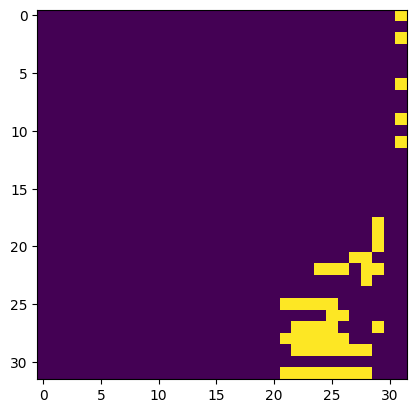

In [178]:
import matplotlib.pyplot as plt
plt.imshow(X_train[400].astype(np.uint8));

In [179]:
(28821, 32, 32, 1)
(28821,)

(28821,)

In [180]:
X_train

array([[[[0.27843137],
         [0.29411765],
         [0.2627451 ],
         ...,
         [0.23137255],
         [0.2       ],
         [0.16470588]],

        [[0.19607843],
         [0.21960784],
         [0.23137255],
         ...,
         [0.18039216],
         [0.19607843],
         [0.19215686]],

        [[0.15294118],
         [0.20392157],
         [0.18431373],
         ...,
         [0.15686275],
         [0.18431373],
         [0.17254902]],

        ...,

        [[0.23137255],
         [0.16470588],
         [0.12941176],
         ...,
         [0.2627451 ],
         [0.24705882],
         [0.27843137]],

        [[0.3254902 ],
         [0.22352941],
         [0.16470588],
         ...,
         [0.38823529],
         [0.29803922],
         [0.18431373]],

        [[0.29803922],
         [0.30980392],
         [0.3254902 ],
         ...,
         [0.39607843],
         [0.40784314],
         [0.30980392]]],


       [[[0.59215686],
         [0.58039216],
         [0.59

In [181]:
y_train

array(['angry', 'angry', 'angry', ..., 'surprise', 'surprise', 'surprise'],
      dtype='<U8')

In [182]:
def value_counts(arr):
    unique, counts = np.unique(arr, return_counts=True)
    return dict(zip(unique, counts))

result = value_counts(y_train)
print(result)

{'angry': 3993, 'disgust': 436, 'fear': 4103, 'happy': 7164, 'neutral': 4982, 'sad': 4938, 'surprise': 3205}


In [183]:
lista_emociones = list(result.keys())

print(lista_emociones)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


ValueError: invalid literal for int() with base 10: 'angry'

In [ ]:
#y_pred_labels = label_encoder.inverse_transform(y_pred)

In [185]:
TEST_PATH = './images/test'

def read_test_data(dataframe, reshape_dim=(32, 32)):
    X = []
    for index, row in dataframe.iterrows():
        img_path = os.path.join(TEST_PATH, f"{row['id']}.jpg")
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises
        if image is not None:
            image = cv2.resize(image, reshape_dim)  # Redimensionar a 32x32
            X.append(image)
    
    X = np.array(X).reshape(-1, reshape_dim[0], reshape_dim[1], 1)  # Agregar canal de color
    return X

X_test = read_test_data (test_csv)
X_test = X_test / 255.0
print (X_test.shape)



(7066, 32, 32, 1)


In [186]:
X_train, X_valid, y_train, y_valid = train_test_split (X_train, y_train, test_size=0.2, random_state=42)

In [195]:
label_encoder = LabelEncoder ()

y_train = label_encoder.fit_transform (y_train)
y_valid = label_encoder.fit_transform (y_valid)

In [187]:
X_train.shape

(23056, 32, 32, 1)

In [188]:
y_train

array(['angry', 'neutral', 'fear', ..., 'angry', 'neutral', 'sad'],
      dtype='<U8')

In [191]:
num_classes = len(np.unique(y_train))
num_classes

7

In [196]:
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_val_onehot = to_categorical(y_valid, num_classes=num_classes)

## OTRO PROCESO

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [197]:


def create_model(input_shape=(32, 32, 1), num_classes=7):
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Crear el modelo
model = create_model(input_shape=(32, 32, 1), num_classes=7)  # Asumiendo 7 clases de emociones

# Resumen del modelo
model.summary()



c:\Users\pobla\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,342,951 (5.12 MB)

 Trainable params: 1,341,031 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [198]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Asegúrate de que y_train y y_val estén en formato one-hot
# Si no lo están, conviértelas así:
# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_val = to_categorical(y_val)

# Definir Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Entrenar el modelo
history = model.fit(
    X_train, 
    y_train_onehot, 
    epochs=10, 
    batch_size=64, 
    validation_data=(X_valid, y_val_onehot), 
    callbacks=[early_stopping]
)

Epoch 1/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.2533 - loss: 2.3983 - val_accuracy: 0.2970 - val_loss: 2.0469
Epoch 2/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 35s 98ms/step - accuracy: 0.3800 - loss: 1.6357 - val_accuracy: 0.4102 - val_loss: 1.5747
Epoch 3/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 35s 96ms/step - accuracy: 0.4594 - loss: 1.4138 - val_accuracy: 0.4869 - val_loss: 1.3246
Epoch 4/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 35s 96ms/step - accuracy: 0.4958 - loss: 1.3100 - val_accuracy: 0.4926 - val_loss: 1.3799
Epoch 5/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 35s 96ms/step - accuracy: 0.5255 - loss: 1.2411 - val_accuracy: 0.5237 - val_loss: 1.2362
Epoch 6/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 35s 96ms/step - accuracy: 0.5433 - loss: 1.2003 - val_accuracy: 0.5346 - val_loss: 1.2286
Epoch 7/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 35s 97ms/step - accuracy: 0.5623 - loss: 1.1506 - val_accuracy: 0.5346 - val_loss: 1.2499
Epoch 8/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 35s 98ms/step - accuracy: 0.5740 - loss: 1.1235 -

In [199]:
predict = model.predict (X_test)
predict = np.argmax (predict, axis= 1)

221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


In [203]:
submission_df = pd.DataFrame ({ 'id_img' : test_csv ['id'],
    'label' : label_encoder.inverse_transform (predict)})

In [204]:
submission_df.to_csv ('submission.csv', index= False)